# Visualizations

In [387]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import sys
import plotly.express as px
from pywaffle import Waffle
from annotated_text import annotation

In [385]:
import yaml
yaml.__version__

'6.0.1'

In [388]:
import annotated_text
annotated_text.__version__

AttributeError: module 'annotated_text' has no attribute '__version__'

In [3]:
sys.path.insert(0, "./portfolio")

import streamlit as st
from streamlit_gsheets import GSheetsConnection
conn = st.connection("gsheets", type=GSheetsConnection)

2024-05-05 15:37:30.682 
  command:

    streamlit run /Users/martinadossi/anaconda3/envs/streamlit_app_311/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [4]:
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

## Set up

In [5]:
sys.path.insert(0, "./portfolio")
with open("config.yml", 'r') as f:
    cfg = yaml.safe_load(f)

dict_emotion_id = cfg['map_emotion_id']
dict_emotion_color = cfg['map_emotion_color']

# dict_emotion_id_inv = {v: k for k, v in dict_emotion_id.items()}

dict_emotion_intensity_id = cfg['map_emotion_intensity_id']
dict_emotion_intensity_color = cfg['map_emotion_intensity_color']

In [6]:
df_emotion = conn.read(
    worksheet="pixel_year",
    ttl="10m",
    usecols=range(13),
    nrows=31
)

df_emotion = df_emotion.rename(columns={df_emotion.columns[0]: 'id_day'})
df_emotion = df_emotion.set_index('id_day')
df_emotion = df_emotion.fillna('0')

df_emotion.head(5)

2024-05-05 15:37:30.951 No runtime found, using MemoryCacheStorageManager
2024-05-05 15:37:30.952 No runtime found, using MemoryCacheStorageManager


,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,Happy,Happy,Happy,Loved,Happy,0,0,0,0,0,0,0
2,Happy,Happy,Happy,Sad,Happy,0,0,0,0,0,0,0
3,Scared,Sad,Happy,Confident,Happy,0,0,0,0,0,0,0
4,Scared,Sad,Happy,Scared,Happy,0,0,0,0,0,0,0
5,Happy,Scared,Sad,Happy,0,0,0,0,0,0,0,0


In [7]:
df_intensity = conn.read(
    worksheet="pixel_year_intensity",
    ttl="10m",
    usecols=range(13),
    nrows=31
)

first_col = df_intensity.columns[0]
df_intensity = df_intensity.rename(columns={first_col: 'id_day'})
df_intensity = df_intensity.set_index('id_day')
df_intensity = df_intensity.fillna('0')

df_intensity.head(5)

2024-05-05 15:37:33.440 No runtime found, using MemoryCacheStorageManager


,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,:),:|,:|,:),:),0,0,0,0,0,0,0
2,:),:),:|,:|,:),0,0,0,0,0,0,0
3,:|,:|,:|,:|,:|,0,0,0,0,0,0,0
4,:|,:|,:|,:|,:|,0,0,0,0,0,0,0
5,:),:|,:|,:),0,0,0,0,0,0,0,0


## Heatmap

### Pixel year

In [8]:
# Replace str valeus with numerical ids
df_emotion_id = df_emotion.copy()

df_emotion_id = (
    pd.DataFrame([df_emotion_id[col].map(dict_emotion_id) for col in df_emotion_id.columns])
    .transpose()
    .fillna(0)
    .astype(int)
)

df_emotion_id.head(5)

,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,2,2,2,3,2,0,0,0,0,0,0,0
2,2,2,2,9,2,0,0,0,0,0,0,0
3,8,9,2,4,2,0,0,0,0,0,0,0
4,8,9,2,8,2,0,0,0,0,0,0,0
5,2,8,9,2,0,0,0,0,0,0,0,0


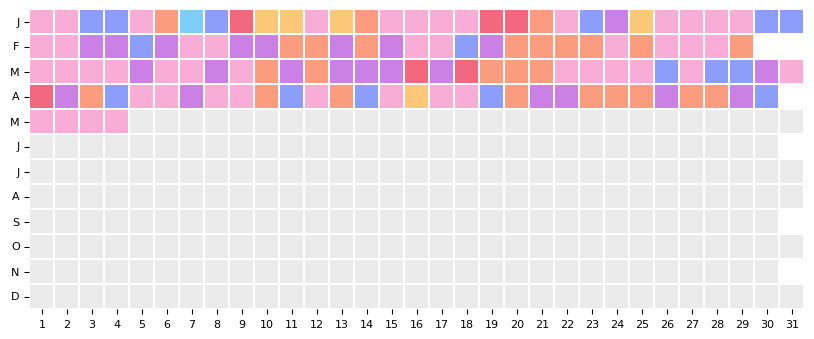

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    df_emotion_id.transpose(),
    cmap=list(dict_emotion_color.values()),
    cbar=False,
    linewidths=1.2,
    linecolor='white',
    square=True,
    vmin=0,
    vmax=len(dict_emotion_color),
    xticklabels=1,
    ax=ax
)

ax.set_yticklabels(labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], rotation=0, fontsize=8)
ax.set_xticklabels(labels=list(df_emotion_id.index), rotation=0, fontsize=8)
ax.set_xlabel('')

plt.show()

### Pixel year intensity

In [10]:
df_intensity_id = df_intensity.copy()

df_intensity_id = (
    pd.DataFrame([df_intensity_id[col].map(dict_emotion_intensity_id) for col in df_intensity_id.columns])
    .transpose()
    .fillna(0)
    .astype(int)
)

df_intensity_id.head(5)

,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,5,4,4,5,5,0,0,0,0,0,0,0
2,5,5,4,4,5,0,0,0,0,0,0,0
3,4,4,4,4,4,0,0,0,0,0,0,0
4,4,4,4,4,4,0,0,0,0,0,0,0
5,5,4,4,5,0,0,0,0,0,0,0,0


In [11]:
labels = df_intensity.transpose().replace('0', '').replace('Missing', '')

In [12]:
dict_emotion_intensity_color

{0: '#ebebeb',
 'Missing': '#ffffff',
 ':((': '#8baac6',
 ':(': '#b7d8ec',
 ':|': '#ebebeb',
 ':)': '#f7d5e2',
 ':))': '#de9eb6'}

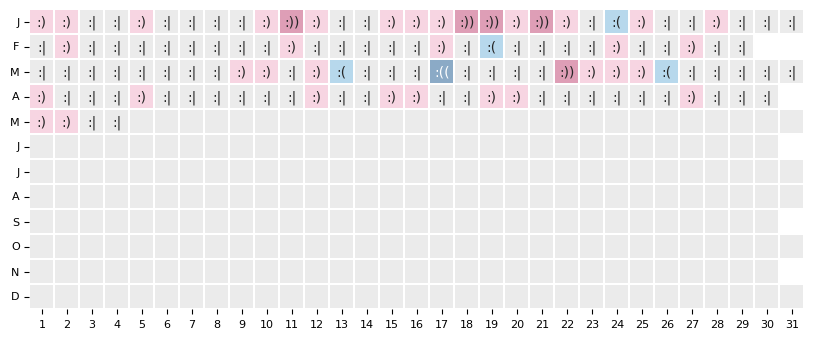

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    df_intensity_id.transpose(),
    cmap=list(dict_emotion_intensity_color.values()),
    cbar=False,
    linewidths=1.2,
    linecolor='white',
    square=True,
    vmin=0,
    #annot=df_intensity_id.transpose(),
    annot=labels,
    fmt='',
    vmax=len(dict_emotion_intensity_color),
    xticklabels=1,
    ax=ax
)

ax.set_yticklabels(labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], rotation=0, fontsize=8)
ax.set_xticklabels(labels=list(df_emotion_id.index), rotation=0, fontsize=8)
ax.set_xlabel('')

plt.show()

## Research questions
- What's the most frequent status change?

- For any state, how often I felt `insert_status`?

In [71]:
df_melt = pd.melt(df_emotion)
df_melt = df_melt[(df_melt['value']!='0') & (df_melt['value']!='Missing')]
df_melt.columns = ['month', 'emotion']
df_melt['day'] = df_melt.groupby(['month']).cumcount()+1
df_melt.head(5)

,month,emotion,day
0,January,Happy,1
1,January,Happy,2
2,January,Scared,3
3,January,Scared,4
4,January,Happy,5


In [73]:
df_count = df_melt[['month', 'emotion']].value_counts().reset_index().rename(columns={0: 'value'})
df_count.head(5)

,month,emotion,value
0,March,Happy,13
1,January,Happy,13
2,February,Happy,10
3,April,Confident,9
4,February,Confident,9


In [53]:
month_list = list(df_emotion.columns)
emotion_list = list(dict_emotion_color.keys())[2:]
len(emotion_list)*len(month_list)

96

In [79]:
from itertools import product

df_month_emotion_base = pd.DataFrame(data=product(month_list, emotion_list), columns=['month', 'emotion'])
df_month_emotion_base['value'] = 0
df_month_emotion_base.shape

(96, 3)

In [80]:
df_month_emotion_base.head(5)

,month,emotion,value
0,January,Happy,0
1,January,Loved,0
2,January,Confident,0
3,January,Playful,0
4,January,Embarassed,0


In [95]:
df_month_emotion = pd.merge(df_month_emotion_base, df_count, how='left', left_on=['month', 'emotion'], right_on = ['month', 'emotion']).fillna(0)
df_month_emotion['value'] = df_month_emotion.value_y.combine_first(df_month_emotion.value_x)
df_month_emotion = df_month_emotion.drop(['value_x', 'value_y'], axis=1)
df_month_emotion.head(5)

,month,emotion,value
0,January,Happy,13.0
1,January,Loved,3.0
2,January,Confident,3.0
3,January,Playful,4.0
4,January,Embarassed,0.0


In [82]:
df_month_emotion.shape

(96, 4)

### Over-time trend

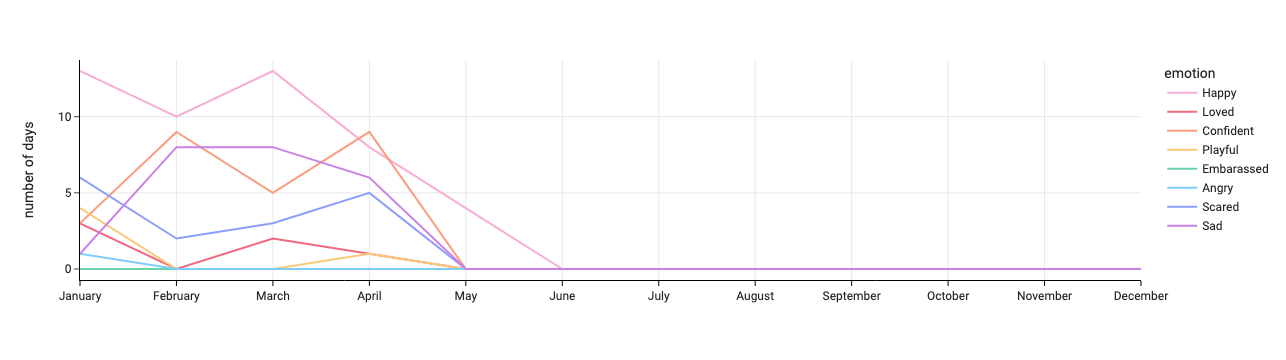

In [163]:
# default
sel_status = 'All'
# sel_status = ['Happy', 'Loved']
config = {'displayModeBar': False}
fig = px.line(
    df_month_emotion,
    x="month",
    y="value",
    color='emotion',
    color_discrete_map=dict_emotion_color,
    template='simple_white'
)
if sel_status!='All':
    for d in fig['data']:
        if d['name'] in sel_status:
            d['line']['color']=dict_emotion_color[d['name']]
            d['line']['width']=3
        if d['name'] not in sel_status:
            d['line']['color']='lightgrey'
fig.update_layout(
    font=dict(
        family="Roboto",
        size=12
    ),
    xaxis_title='',
    yaxis_title='number of days',
    xaxis=dict(showgrid=True, tickcolor='black', title_font_color='black'), 
    yaxis=dict(showgrid=True)
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.show(config=config)

### Bar plot (overall)

In [206]:
df_n_days = df_month_emotion.groupby('emotion').agg({'value': sum}).reindex(emotion_list).reset_index()
df_n_days

,emotion,value
0,Happy,48.0
1,Loved,6.0
2,Confident,26.0
3,Playful,5.0
4,Embarassed,0.0
5,Angry,1.0
6,Scared,16.0
7,Sad,23.0


In [217]:
positive_emotion_list = emotion_list[:4]
negative_emotion_list = emotion_list[4:]

In [219]:
df_n_days['value'].max()

48.0

In [ ]:
df_n_days_pos = df_n_days[df_n_days.emotion.isin(positive_emotion_list)]
df_n_days_neg = df_n_days[df_n_days.emotion.isin(negative_emotion_list)]

In [247]:
df_n_days_pos

,emotion,value
0,Happy,48.0
1,Loved,6.0
2,Confident,26.0
3,Playful,5.0


In [248]:
df_n_days_neg['value_correct'] = list(df_n_days_pos['value'])
df_n_days_neg

/var/folders/qn/djxdknh17jg42h6vtd0z29100000gn/T/ipykernel_11929/2670208226.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,emotion,value,value_correct
4,Embarassed,0.0,48.0
5,Angry,1.0,6.0
6,Scared,16.0,26.0
7,Sad,23.0,5.0


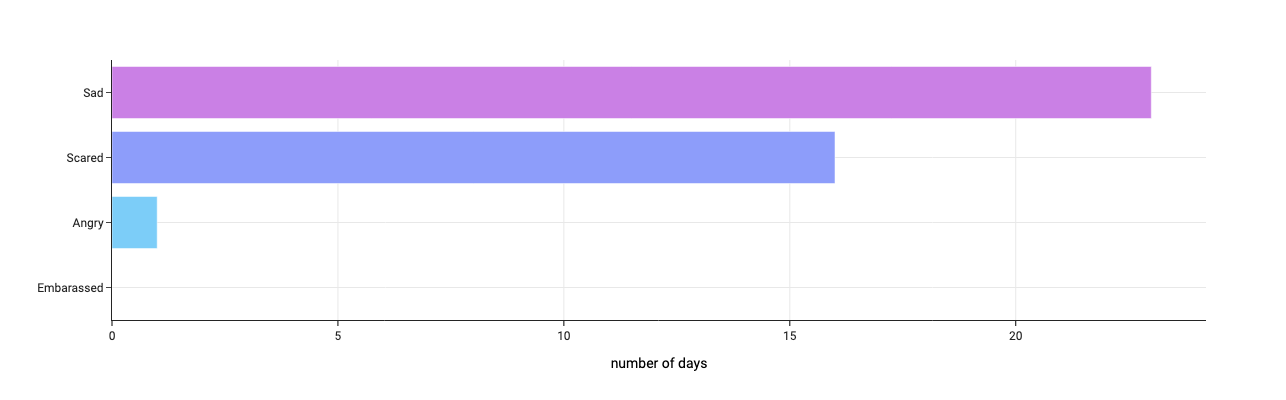

In [218]:
df_n_days_pos = df_n_days[df_n_days.emotion.isin(positive_emotion_list)]
df_n_days_neg = df_n_days[df_n_days.emotion.isin(negative_emotion_list)]
fig = px.bar(
    df_n_days_neg.sort_values(by='value', ascending=False),
    x="value",
    y="emotion",
    color="emotion",
    color_discrete_map=dict_emotion_color,
    orientation='h',
    #hover_data=["tip", "size"],
    height=400,
    width=500,
    template='simple_white'
)
fig.update_layout(
    font=dict(
        family="Roboto",
        size=12
    ),
    xaxis_title='number of days',
    yaxis_title='',
    xaxis=dict(showgrid=True, tickcolor='black', title_font_color='black'), 
    yaxis=dict(showgrid=True),
    showlegend=False
)
fig.show()

In [171]:
df_example = pd.pivot_table(df_month_emotion, index='month', columns='emotion', values='value')[emotion_list].reindex(month_list)

In [367]:
df_n_days['perc_value'] = round(100*df_n_days.value/df_n_days.value.sum()).astype(int)
df_n_days['emotion_type'] = list(np.repeat('positive emotion', 4)) + list(np.repeat('negative emotion', 4))
df_n_days

,emotion,value,perc_value,emotion_type
0,Happy,48.0,38,positive emotion
1,Loved,6.0,5,positive emotion
2,Confident,26.0,21,positive emotion
3,Playful,5.0,4,positive emotion
4,Embarassed,0.0,0,negative emotion
5,Angry,1.0,1,negative emotion
6,Scared,16.0,13,negative emotion
7,Sad,23.0,18,negative emotion


In [337]:
df_waffle = df_n_days.sort_values(by=['emotion_type', 'perc_value'], ascending=[False, False])
waffle_dict = df_waffle.set_index('emotion')[['perc_value']].to_dict()['perc_value']

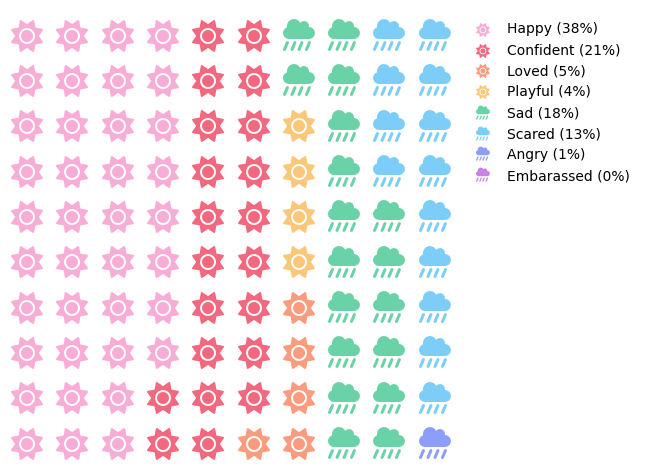

In [339]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,
    values=waffle_dict,
    colors=list(dict_emotion_color.values())[2:],
    icon_style='solid',
    icon_legend=True,
    icons=['sun', 'sun', 'sun', 'sun', 'cloud-showers-heavy', 'cloud-showers-heavy', 'cloud-showers-heavy', 'cloud-showers-heavy'],
    block_arranging_style='snake',
    legend={
        'labels': [f"{k} ({v}%)" for k, v in waffle_dict.items()],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1),
        'framealpha': 0
    },
)
#fig.axes[0].get_legend().remove()
plt.show()

In [369]:
dict_emotion_color_extended = dict_emotion_color
dict_emotion_color_extended.update({'(?)': 'lightgray'})
dict_emotion_color_extended

{0: '#ebebeb',
 'Missing': '#ffffff',
 'Happy': '#f7add6',
 'Loved': '#f2687f',
 'Confident': '#fa9c7d',
 'Playful': '#fbc779',
 'Embarassed': '#6ad2a7',
 'Angry': '#7ccdf8',
 'Scared': '#8d9dfa',
 'Sad': '#ca80e5',
 'positive': 'lightgray',
 '(?)': 'lightgray'}

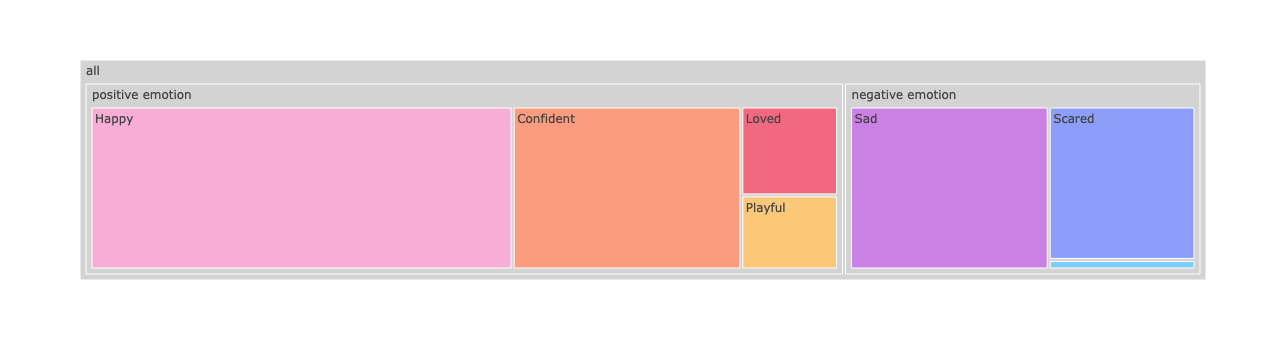

In [379]:
fig = px.treemap(
    df_n_days,
    path=[px.Constant("all"), 'emotion_type', 'emotion'],
    values='value',
    color='emotion',
    color_discrete_map=dict_emotion_color_extended
)
fig.update_traces(marker=dict(cornerradius=10))
fig.data[0].hovertemplate = '%{label}<br>number of days: %{value}'
fig.show()

In [382]:
old_labels=fig.data[0].labels
new_labels=[f"{ol}%"  for ol  in old_labels[:-10]]
new_labels

['Playful%']

### Altro

In [221]:
df

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4
...,...,...,...
123,WSW,6+,0.1
124,W,6+,0.9
125,WNW,6+,2.2
126,NW,6+,1.5


In [222]:
df_month_emotion

,month,emotion,value
0,January,Happy,13.0
1,January,Loved,3.0
2,January,Confident,3.0
3,January,Playful,4.0
4,January,Embarassed,0.0
...,...,...,...
91,December,Playful,0.0
92,December,Embarassed,0.0
93,December,Angry,0.0
94,December,Scared,0.0


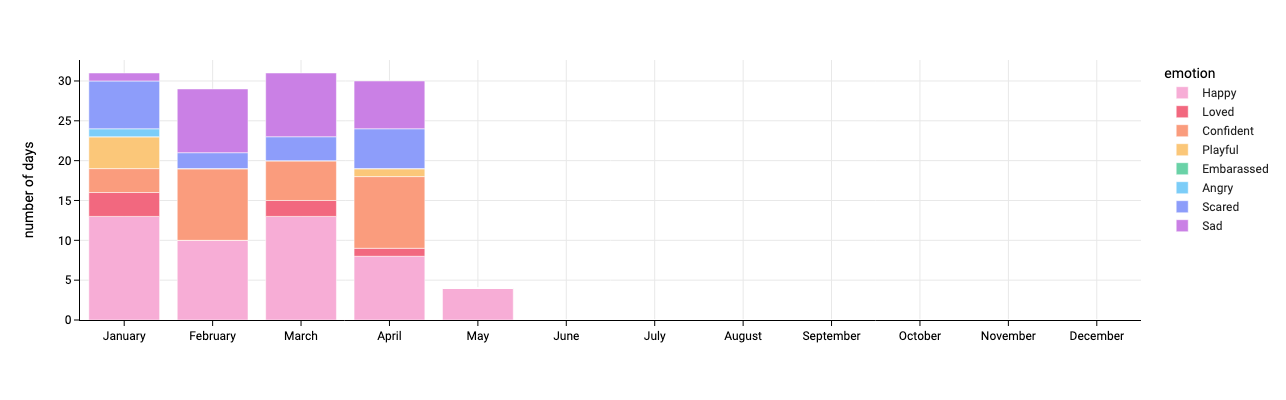

In [244]:
fig = px.bar(
    df_month_emotion,
    x="month",
    y="value",
    color="emotion",
    color_discrete_map=dict_emotion_color,
    template="simple_white"
)
fig.update_layout(
    font=dict(
        family="Roboto",
        size=12,
    ),
    legend_title_font_color="black",
    height=400,
    xaxis_title="",
    yaxis_title="number of days",
    xaxis=dict(showgrid=True, tickcolor='black', color='black'),
    yaxis=dict(showgrid=True, tickcolor='black', color='black')
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.show()

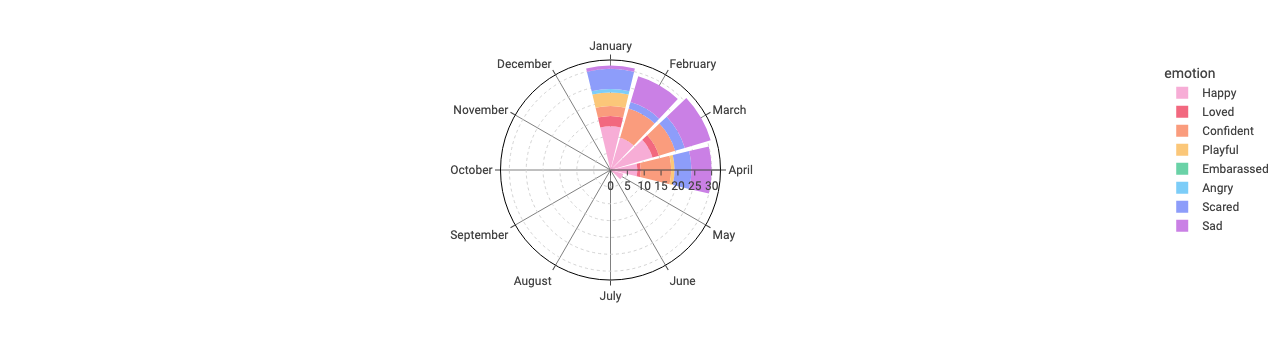

In [241]:
fig = px.bar_polar(
    df_month_emotion,
    r="value",
    theta="month",
    color="emotion",
    color_discrete_map=dict_emotion_color,
    template=None
)
fig.update_layout(
    font=dict(
        family="Roboto",
        size=12
    ),
    polar=dict(
        bgcolor="white",
        radialaxis = dict(
            gridcolor='lightgray',
            griddash='dot'
            ),
        angularaxis = dict(
            linecolor='black',
            gridcolor='gray',
        )
    ),
)
fig.show()

In [224]:
px.colors.sequential.Plasma_r

['#f0f921',
 '#fdca26',
 '#fb9f3a',
 '#ed7953',
 '#d8576b',
 '#bd3786',
 '#9c179e',
 '#7201a8',
 '#46039f',
 '#0d0887']

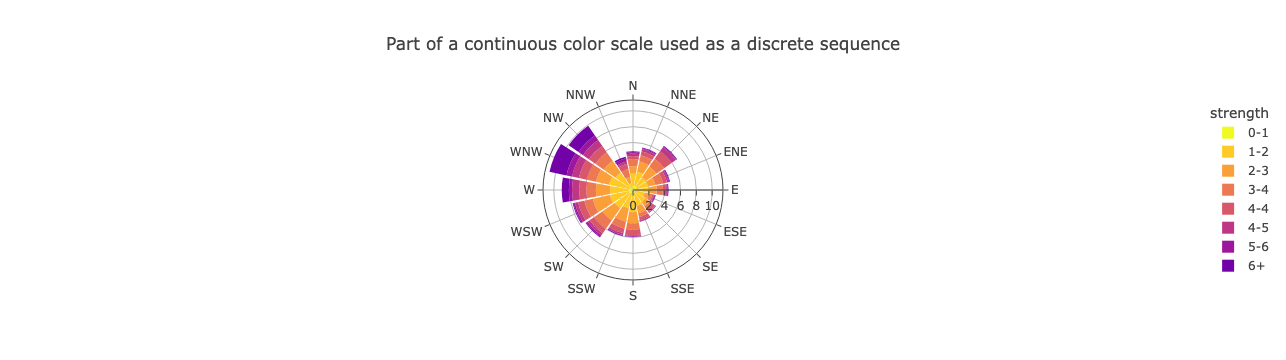

In [220]:
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", color="strength",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                   title="Part of a continuous color scale used as a discrete sequence"
                  )
fig.show()

In [66]:
df_all['emotion'].value_counts()

Happy        44
Confident    25
Sad          22
Scared       15
Loved         6
Playful       5
Angry         1
Name: emotion, dtype: int64

In [74]:
df_month_emotion = pd.DataFrame(df_all[['month', 'emotion']].value_counts().sort_index()).reset_index()
df_month_emotion.columns = ['month', 'emotion', 'count']

In [79]:
df_month_emotion_pivot = pd.pivot_table(df_month_emotion, values='count', index='month', columns='emotion').fillna(0)
df_month_emotion_pivot = df_month_emotion_pivot.reindex(['January', 'February', 'March', 'April'])
df_month_emotion_pivot

emotion,Angry,Confident,Happy,Loved,Playful,Sad,Scared
month,,,,,,,
January,1.0,3.0,13.0,3.0,4.0,1.0,6.0
February,0.0,9.0,10.0,0.0,0.0,8.0,2.0
March,0.0,5.0,13.0,2.0,0.0,8.0,3.0
April,0.0,8.0,8.0,1.0,1.0,5.0,4.0
